# Exploratory Data Analysis of StackExchange Data
                
                                                                                  -  Thulasi Gabbita(NU01134)
                                                                                  -  Shivakumar Jayaraman(KJ04412)

# Introduction:
As part of DATA-601 Mid Term project, We have taken the Stack exchange(StackOverFlow) dataset to perform Exploratory Data Analysis. 
Stack Exchange dataset essentially containing information about the users of stack overflow, the badges or reputation they possess, posts posted by users, the comments, upvotes, and downvotes each post has received etc.

### Our dataset contains 5 data files:
- Users - Which has all the information about users like username, profileURL, short bio about the user, location, upvotes and downvotes they received, reputation etc.
- Badges - Contains data about the badges each user possess and the class of the badge(class 1 = Gold, class 2 = Silver, class 3-Bronze)
- Posts - Emphasizes on Posts info such as post body, post type, title, post creation date, any answers if accepted, post score 
- Comments - Provides the details about the comments of each post, comment creation date, comment score, comment text
- Votes - Possess the data of votes received for each post, vote type(upvotes/downvotes), vote creation date 
                
#### Source: Link: https://archive.org/download/stackexchange

In [1]:
#importing libraries
import pandas as pd
import os
import numpy as np

# Loading all the datasets

In [2]:
Badges = pd.read_csv('Badges.csv')
Users = pd.read_csv('Users.csv', encoding='Windows-1252')
Votes = pd.read_csv('Votes.csv')
Comments = pd.read_csv('Comments.csv', encoding='Windows-1252')
Posts = pd.read_csv('Posts.csv', encoding='Windows-1252')

# Cleaning individual dataframes

## Badges
- This dataset contains the various badges achieved by the users.
- There are many kinds of badges which are granted by others and they belong from 3-bronze to 1-gold Class.

In [3]:
Badges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136143 entries, 0 to 136142
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Id        136143 non-null  int64 
 1   UserId    136143 non-null  int64 
 2   Name      136143 non-null  object
 3   Date      136143 non-null  object
 4   Class     136143 non-null  int64 
 5   TagBased  136143 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 5.3+ MB


In [4]:
#Drop ID and TagBased columns
Badges = Badges.drop(['Id','TagBased'], axis=1 )

#Convert Date column to datetime format
Badges['Date'] = pd.to_datetime(Badges['Date'])

#renaming column names
Badges = Badges.rename(columns={'Date':'BadgesDate','Name':'BadgeName'})

Badges.isnull().sum()

UserId        0
BadgeName     0
BadgesDate    0
Class         0
dtype: int64

In [5]:
# convert UserId to int
Badges['UserId'] = Badges['UserId'].astype('int')
Badges.head()

,UserId,BadgeName,BadgesDate,Class
0,1,Informed,2014-05-13 23:06:44.683,3
1,2,Autobiographer,2014-05-13 23:11:04.153,3
2,4,Autobiographer,2014-05-13 23:20:53.547,3
3,5,Autobiographer,2014-05-13 23:20:53.547,3
4,8,Autobiographer,2014-05-13 23:20:53.547,3


## Users
- This data contains data about the user such as their "reputation", "upvotes", "downvotes".

In [6]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119541 entries, 0 to 119540
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Id               119541 non-null  int64  
 1   Reputation       119541 non-null  int64  
 2   CreationDate     119541 non-null  object 
 3   DisplayName      119533 non-null  object 
 4   LastAccessDate   119541 non-null  object 
 5   WebsiteUrl       18275 non-null   object 
 6   Location         48629 non-null   object 
 7   AboutMe          33524 non-null   object 
 8   Views            119541 non-null  int64  
 9   UpVotes          119541 non-null  int64  
 10  DownVotes        119541 non-null  int64  
 11  AccountId        119536 non-null  float64
 12  ProfileImageUrl  95280 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 11.9+ MB


In [7]:
#drop unnecessary columns
Users = Users.drop(['ProfileImageUrl','DisplayName','WebsiteUrl','AccountId','AboutMe','Location'], axis=1) 

#renaming Id to UserId and CreationDate to UserCreationDate
Users = Users.rename(columns={'Id':'UserId', 'CreationDate':'UserCreationDate', 'Views':'profileViews'}) 

#changing dates type
Users[['UserCreationDate','LastAccessDate']] = Users[['UserCreationDate','LastAccessDate']].apply(pd.to_datetime)
# Users.head()

## Votes


In [8]:
Votes.head()

,Id,PostId,VoteTypeId,CreationDate,UserId,BountyAmount
0,1,1,2,5/13/2014 0:00,NaN,NaN
1,2,1,2,5/13/2014 0:00,NaN,NaN
2,3,3,2,5/13/2014 0:00,NaN,NaN
3,5,3,2,5/13/2014 0:00,NaN,NaN
4,6,1,2,5/13/2014 0:00,NaN,NaN


In [9]:
# percentage of null value present
Votes.isnull().mean()*100

Id               0.000000
PostId           0.000000
VoteTypeId       0.000000
CreationDate     0.000000
UserId          89.116705
BountyAmount    99.591685
dtype: float64

In [10]:
# fixing dtype of "CreationDate"
Votes['CreationDate'] = pd.to_datetime(Votes['CreationDate'])

In [11]:
#to drop unnecessary columns
Votes = Votes.drop(['UserId','BountyAmount'], axis =1)

#renaming columns
Votes=Votes.rename(columns={'Id':'VoteId','CreationDate':'VoteCreationDate'})

Votes.head()

,VoteId,PostId,VoteTypeId,VoteCreationDate
0,1,1,2,2014-05-13
1,2,1,2,2014-05-13
2,3,3,2,2014-05-13
3,5,3,2,2014-05-13
4,6,1,2,2014-05-13


## Comments
- Posts and the comments that each post contain.

In [12]:
Comments.head()

,Id,PostId,Score,Text,CreationDate,UserId,ContentLicense,UserDisplayName
0,5,5,9,this is a super theoretical AI question. An in...,2014-05-14T00:23:15.437,34.0,CC BY-SA 3.0,NaN
1,6,7,4,List questions are usually not suited for Stac...,2014-05-14T00:38:19.510,51.0,CC BY-SA 3.0,NaN
2,9,7,3,This question appears to be off-topic because ...,2014-05-14T01:16:12.623,66.0,CC BY-SA 3.0,NaN
3,12,15,3,This question is far too broad. It may be salv...,2014-05-14T02:00:22.797,51.0,CC BY-SA 3.0,NaN
4,13,10,2,"Nice one, @Nicholas... Another book from Hasti...",2014-05-14T02:16:20.503,24.0,CC BY-SA 3.0,NaN


In [13]:
# Percentage of null values present
Comments.isnull().mean()*100

Id                  0.000000
PostId              0.000000
Score               0.000000
Text                0.000000
CreationDate        0.000000
UserId              0.620483
ContentLicense      0.000000
UserDisplayName    99.379517
dtype: float64

In [14]:
#drop unnecessary columns
Comments = Comments.drop(['UserDisplayName','ContentLicense'], axis =1)

#rename columns
Comments=Comments.rename(columns={'Id':'CommentId','Text':'CommentText','CreationDate':'CommentCreationDate', 
                                  'Score':'CommentScore'})

#change CreationDate type
Comments['CommentCreationDate'] = pd.to_datetime(Comments['CommentCreationDate'])

In [15]:
# imputing null "userid" with -1.
Comments.loc[Comments['UserId'].isnull() == True, 'UserId'] =  -1

# convert UserId to int
Comments['UserId'] = Comments['UserId'].astype('int')

# drop all "null" rows in Text  
txt_null = Comments.loc[Comments['CommentText'].isnull() == True].index
Comments.drop(labels=txt_null, inplace=True)

In [16]:
#check for punctuation
Comments['text1'] = Comments['CommentText'].str.replace(r'[^\w\s]+', '', regex=True)
Comments['text1'] = Comments['text1'].str.replace('\r\n\r\n', '.') 

#taking commentText length
Comments['CommentTextLength'] = Comments['text1'].apply(lambda x: len(x.split(' ')))

#droping temparory column(text1)
Comments.drop(columns=['text1','CommentText'], inplace=True)

Comments.head(2)

,CommentId,PostId,CommentScore,CommentCreationDate,UserId,CommentTextLength
0,5,5,9,2014-05-14 00:23:15.437,34,14
1,6,7,4,2014-05-14 00:38:19.510,51,42


## Posts
This contains data about Posts(could be a question, answers, etc), title of question, tags

In [17]:
Posts.head(3)

,Id,PostTypeId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,Tags,...,FavoriteCount,ClosedDate,ContentLicense,AcceptedAnswerId,LastEditorUserId,LastEditDate,ParentId,OwnerDisplayName,CommunityOwnedDate,LastEditorDisplayName
0,5,1,2014-05-13T23:58:30.457,9,862.0,<p>I've always been interested in machine lear...,5.0,2014-05-14T00:36:31.077,How can I do simple machine learning without h...,<machine-learning>,...,1.0,2014-05-14T14:40:25.950,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,1,2014-05-14T00:11:06.457,4,469.0,"<p>As a researcher and instructor, I'm looking...",36.0,2014-05-16T13:45:00.237,What open-source books (or other materials) pr...,<education><open-source>,...,1.0,2014-05-14T08:40:54.950,CC BY-SA 3.0,10.0,97.0,2014-05-16T13:45:00.237,NaN,NaN,NaN,NaN
2,9,2,2014-05-14T00:36:31.077,5,NaN,"<p>Not sure if this fits the scope of this SE,...",51.0,2014-05-14T00:36:31.077,NaN,NaN,...,NaN,NaN,CC BY-SA 3.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN


In [18]:
# Percentage of null values present in "Posts"
Posts.isnull().mean()*100

Id                        0.000000
PostTypeId                0.000000
CreationDate              0.000000
Score                     0.000000
ViewCount                52.800154
Body                      0.227800
OwnerUserId               0.543426
LastActivityDate          0.000000
Title                    52.800154
Tags                     52.800154
AnswerCount              52.800154
CommentCount              0.000000
FavoriteCount            87.943077
ClosedDate               96.986456
ContentLicense            0.000000
AcceptedAnswerId         84.626257
LastEditorUserId         63.600060
LastEditDate             63.396962
ParentId                 48.123396
OwnerDisplayName         99.252103
CommunityOwnedDate       99.640461
LastEditorDisplayName    99.781806
dtype: float64

In [19]:
# drop all "null" rows in Body  
txt_null = Posts.loc[Posts['Body'].isnull() == True].index
Posts.drop(labels=txt_null, inplace=True)

#check for punctuation
Posts['text1'] = Posts['Body'].str.replace(r'[^\w\s]+', '', regex=True)
Posts['text1'] = Posts['text1'].str.replace('\r\n\r\n', '.') 

#taking commentText length
Posts['PostBodyLength'] = Posts['text1'].apply(lambda x: len(x.split(' ')))

#droping temparory column(text1)
Posts.drop(columns=['text1','Body'], inplace=True)

In [20]:
#dropping unnecessary columns
Posts.drop(['OwnerDisplayName','CommunityOwnedDate','LastEditorDisplayName','ClosedDate','FavoriteCount',
            'ContentLicense','Title','LastEditorUserId','LastEditDate'],axis=1,inplace=True)

#renaming columns
Posts=Posts.rename(columns={'Id':'PostId','CreationDate':'PostCreationDate','Score':'PostScore', 'ViewCount':'PostViewCount'})

#dates type correction
Posts[['PostCreationDate','LastActivityDate']] = Posts[['PostCreationDate','LastActivityDate']].apply(pd.to_datetime)


# imputing null "userid" with -1.
Posts.loc[Posts['OwnerUserId'].isnull() == True, 'OwnerUserId'] =  -1
# convert OwnerUserId to int
Posts['OwnerUserId'] = Posts['OwnerUserId'].astype('int')

Posts.head(3)

,PostId,PostTypeId,PostCreationDate,PostScore,PostViewCount,OwnerUserId,LastActivityDate,Tags,AnswerCount,CommentCount,AcceptedAnswerId,ParentId,PostBodyLength
0,5,1,2014-05-13 23:58:30.457,9,862.0,5,2014-05-14 00:36:31.077,<machine-learning>,1.0,1,NaN,NaN,85
1,7,1,2014-05-14 00:11:06.457,4,469.0,36,2014-05-16 13:45:00.237,<education><open-source>,3.0,4,10.0,NaN,49
2,9,2,2014-05-14 00:36:31.077,5,NaN,51,2014-05-14 00:36:31.077,NaN,NaN,0,NaN,5.0,166


# Sanity Checks

In [21]:
Badges.describe()

,UserId,Class
count,136143.000000,136143.000000
mean,58445.209420,2.898709
std,37838.163723,0.335424
min,1.000000,1.000000
25%,27089.500000,3.000000
50%,54462.000000,3.000000
75%,85993.000000,3.000000
max,140790.000000,3.000000


In [22]:
Users.describe()

,UserId,Reputation,profileViews,UpVotes,DownVotes
count,119541.000000,119541.000000,119541.000000,119541.000000,119541.000000
mean,72970.844714,49.740424,1.624589,1.318343,0.122351
std,39412.552358,207.810698,26.690287,26.754330,10.208218
min,-1.000000,1.000000,0.000000,0.000000,0.000000
25%,40156.000000,1.000000,0.000000,0.000000,0.000000
50%,73495.000000,1.000000,0.000000,0.000000,0.000000
75%,106654.000000,101.000000,0.000000,0.000000,0.000000
max,140797.000000,27563.000000,3789.000000,4855.000000,2180.000000


In [23]:
Votes.describe()

,VoteId,PostId,VoteTypeId
count,228010.000000,228010.000000,228010.000000
mean,135516.498412,39582.339994,3.314311
std,76362.793727,30322.272785,3.309082
min,1.000000,1.000000,1.000000
25%,70615.250000,14263.250000,2.000000
50%,135289.500000,31615.000000,2.000000
75%,199777.750000,61618.000000,3.000000
max,271104.000000,114667.000000,16.000000


In [24]:
Comments.describe()

,CommentId,PostId,CommentScore,UserId,CommentTextLength
count,75264.000000,75264.000000,75264.000000,75264.000000,75264.000000
mean,60148.502206,53618.040750,0.236102,53619.038305,33.021989
std,32831.254398,32516.091069,0.837647,36725.148350,24.953815
min,5.000000,5.000000,0.000000,-1.000000,1.000000
25%,32625.750000,25715.000000,0.000000,23159.000000,14.000000
50%,60160.500000,51159.000000,0.000000,53479.000000,26.000000
75%,88245.250000,80784.000000,0.000000,77251.000000,46.000000
max,115800.000000,114662.000000,48.000000,140757.000000,413.000000


In [25]:
Posts.describe()

,PostId,PostTypeId,PostScore,PostViewCount,OwnerUserId,AnswerCount,CommentCount,AcceptedAnswerId,ParentId,PostBodyLength
count,72705.000000,72705.000000,72705.000000,34395.000000,72705.000000,34395.000000,72705.000000,11203.000000,37803.000000,72705.000000
mean,57557.401320,1.543800,2.050395,1824.488501,58931.169562,1.099084,1.035197,53289.701955,50261.225829,163.128822
std,33026.168627,0.554952,6.265098,9690.919012,38860.071850,1.042649,1.838026,31494.292426,31709.155297,257.017187
min,5.000000,1.000000,-6.000000,2.000000,-1.000000,0.000000,0.000000,10.000000,5.000000,1.000000
25%,29004.000000,1.000000,0.000000,46.000000,26522.000000,0.000000,0.000000,26443.000000,23401.000000,63.000000
50%,56314.000000,2.000000,1.000000,155.000000,57819.000000,1.000000,0.000000,51454.000000,46885.000000,110.000000
75%,85932.000000,2.000000,2.000000,743.000000,86339.000000,1.000000,2.000000,79717.500000,75133.000000,188.000000
max,114670.000000,7.000000,439.000000,391883.000000,140791.000000,35.000000,24.000000,114655.000000,114666.000000,28627.000000


# Merging datasets into one

In [26]:
# Merging "badges" and "Users" on "userId"
badges_users_df = pd.merge(left=Badges, right=Users, on='UserId')

# merging "Posts" and "comments" on "Postid"
posts_comments_df = pd.merge(Posts,Comments, on='PostId')

# merging "posts", "comments" and "votes" on "PostId"
posts_comments_votes_df = pd.merge(posts_comments_df, Votes, on = 'PostId')

# Merging all intermediate dataframes together

In [27]:
badges_users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136143 entries, 0 to 136142
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   UserId            136143 non-null  int32         
 1   BadgeName         136143 non-null  object        
 2   BadgesDate        136143 non-null  datetime64[ns]
 3   Class             136143 non-null  int64         
 4   Reputation        136143 non-null  int64         
 5   UserCreationDate  136143 non-null  datetime64[ns]
 6   LastAccessDate    136143 non-null  datetime64[ns]
 7   profileViews      136143 non-null  int64         
 8   UpVotes           136143 non-null  int64         
 9   DownVotes         136143 non-null  int64         
dtypes: datetime64[ns](3), int32(1), int64(5), object(1)
memory usage: 10.9+ MB


In [28]:
posts_comments_votes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354166 entries, 0 to 354165
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   PostId               354166 non-null  int64         
 1   PostTypeId           354166 non-null  int64         
 2   PostCreationDate     354166 non-null  datetime64[ns]
 3   PostScore            354166 non-null  int64         
 4   PostViewCount        173664 non-null  float64       
 5   OwnerUserId          354166 non-null  int32         
 6   LastActivityDate     354166 non-null  datetime64[ns]
 7   Tags                 173664 non-null  object        
 8   AnswerCount          173664 non-null  float64       
 9   CommentCount         354166 non-null  int64         
 10  AcceptedAnswerId     83861 non-null   float64       
 11  ParentId             180502 non-null  float64       
 12  PostBodyLength       354166 non-null  int64         
 13  CommentId     

In [29]:
# Merge all 3 intermediate dataframes
combined_df = pd.merge(left=posts_comments_votes_df, right=badges_users_df, on='UserId', how='right')

In [30]:
combined_df.isnull().mean()*100

PostId                  0.679129
PostTypeId              0.679129
PostCreationDate        0.679129
PostScore               0.679129
PostViewCount          48.183273
OwnerUserId             0.679129
LastActivityDate        0.679129
Tags                   48.183273
AnswerCount            48.183273
CommentCount            0.679129
AcceptedAnswerId       74.090450
ParentId               52.495856
PostBodyLength          0.679129
CommentId               0.679129
CommentScore            0.679129
CommentCreationDate     0.679129
UserId                  0.000000
CommentTextLength       0.679129
VoteId                  0.679129
VoteTypeId              0.679129
VoteCreationDate        0.679129
BadgeName               0.000000
BadgesDate              0.000000
Class                   0.000000
Reputation              0.000000
UserCreationDate        0.000000
LastAccessDate          0.000000
profileViews            0.000000
UpVotes                 0.000000
DownVotes               0.000000
dtype: flo

In [31]:
# deleting columns with a significant number of missing values
combined_df.drop(columns=['ParentId', 'AcceptedAnswerId'], inplace=True)

In [32]:
combined_df.drop_duplicates(inplace=True)

In [33]:
combined_df.dropna(inplace=True)

In [34]:
# all the columns of "float" type can be converted to int32.
for cols in combined_df:
    if(combined_df[cols].dtype == 'float64' or combined_df[cols].dtype == 'int64'):
        combined_df[cols] = combined_df[cols].astype('int32')

In [35]:
# dropping redundant columns
final_drop_columns = ['OwnerUserId', 'LastActivityDate', 'CommentId', 'CommentScore', 'CommentCreationDate', 'CommentTextLength', 'VoteId', 'VoteCreationDate', 'LastAccessDate', 'PostTypeId', 'BadgesDate']
cleaned_new_df = combined_df.drop(columns=final_drop_columns)

In [36]:
# first remove the "-" in the tags and then use regex to clean out all the other junk characters.
cleaned_new_df['Tags'] = cleaned_new_df['Tags'].str.replace('-', '')
cleaned_new_df['Tags'] = cleaned_new_df['Tags'].str.replace(r'[^\w\s]+', ' ', regex=True)


In [37]:
# Each "Tags" field contains multiple tags in it. 
# Splitting them up and creating a new row for each.
cleaned_new_df['id'] = cleaned_new_df.index+1
cleaned_new_df['newTags'] = cleaned_new_df.set_index('id')['Tags'].str.split(' ', expand = True).stack().reset_index(1, drop = True).reset_index(name = 'newTags')['newTags']

# Drop the old "Tags" column
cleaned_new_df.drop(columns=['Tags', 'id'], inplace=True)

In [38]:
# some tags fields are empty "". Cleaning them out.
empty_tags = cleaned_new_df.loc[cleaned_new_df['newTags'] == ''].index
cleaned_new_df.drop(empty_tags, axis=0, inplace=True)

In [39]:
cleaned_new_df.reset_index(drop=True, inplace=True)

In [40]:
cleaned_new_df.head().T

,0,1,2,3,4
PostId,191,191,191,191,191
PostCreationDate,2014-05-22 13:36:24.120000,2014-05-22 13:36:24.120000,2014-05-22 13:36:24.120000,2014-05-22 13:36:24.120000,2014-05-22 13:36:24.120000
PostScore,8,8,8,8,8
PostViewCount,1126,1126,1126,1126,1126
AnswerCount,2,2,2,2,2
CommentCount,2,2,2,2,2
PostBodyLength,50,50,50,50,50
UserId,11,11,11,11,11
VoteTypeId,2,2,2,2,2
BadgeName,Autobiographer,Autobiographer,Autobiographer,Precognitive,Precognitive


In [41]:
cleaned_new_df.nunique().sort_values(ascending=False)

PostId              11086
PostCreationDate    11086
UserId               6236
UserCreationDate     6236
PostViewCount        3491
PostBodyLength        903
Reputation            829
newTags               419
profileViews          244
UpVotes               211
BadgeName              97
PostScore              97
DownVotes              70
CommentCount           22
AnswerCount            17
VoteTypeId              9
Class                   3
dtype: int64

# Data Analysis

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

## Univariate analysis

### Top Tags of machine learning & data science.

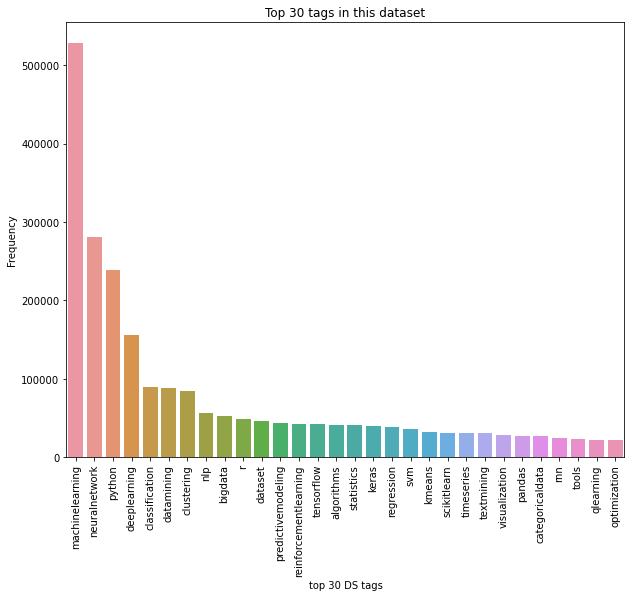

In [43]:
# plt.figure(figsize=(10, 8))
fig, ax = plt.subplots(figsize=(10, 8))
top_30_tags = cleaned_new_df['newTags'].value_counts()[:30].reset_index()
sns.barplot(data=top_30_tags, x='index', y='newTags')
ax.set_xlabel('top 30 DS tags')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.title("Top 30 tags in this dataset")
plt.show()

From the above visualization:
- we can understand what are the top 30 DS tags
- machinelearning is the top area in data science related posts

### Comparing common "machine learning" tags with "data science" tags. (common Y-axis)
- neural networks is more prevalant than python.
- matlab is also considered as a datascience skill

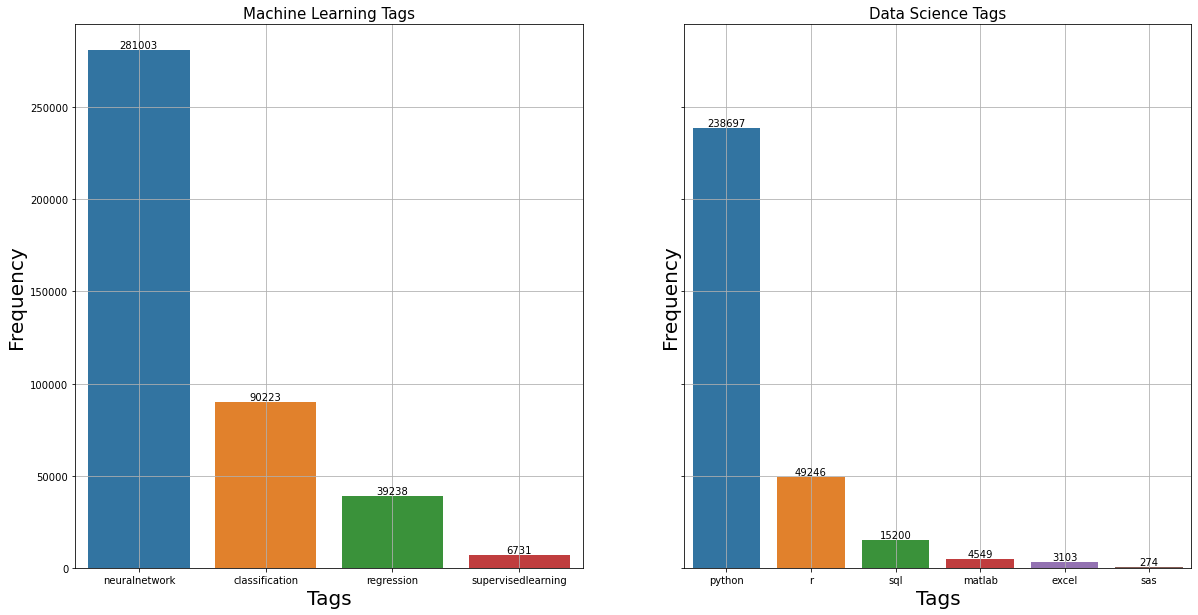

In [44]:
# frequency of tags used for Data Science and machine learning
dsTags = ['python', 'r', 'matlab', 'sas', 'excel', 'sql']
mlTags = ['classification', 'supervisedlearning', 'regression', 'clusteranalysis', 'neuralnetwork']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
ml_tag_freq = cleaned_new_df.loc[cleaned_new_df['newTags'].isin(mlTags)]['newTags'].value_counts().reset_index()
ds_tag_freq = cleaned_new_df.loc[cleaned_new_df['newTags'].isin(dsTags)]['newTags'].value_counts().reset_index()
sns.barplot(data=ml_tag_freq, x='index', y='newTags', ax=ax1)
sns.barplot(data=ds_tag_freq, x='index', y='newTags', ax=ax2)
ax1.grid()
ax1.set_title('Machine Learning Tags', fontsize=15)
ax1.set_xlabel('Tags', fontsize=20)
ax1.set_ylabel('Frequency', fontsize=20)
# annotating the frequency of each tag
ax1.bar_label(ax1.containers[0])
ax2.grid()
ax2.set_title('Data Science Tags', fontsize=15)
ax2.set_xlabel('Tags', fontsize=20)
ax2.set_ylabel('Frequency', fontsize=20)

# annotating the frequency of each tag
ax2.bar_label(ax2.containers[0])

plt.show()

### Distribution of Views

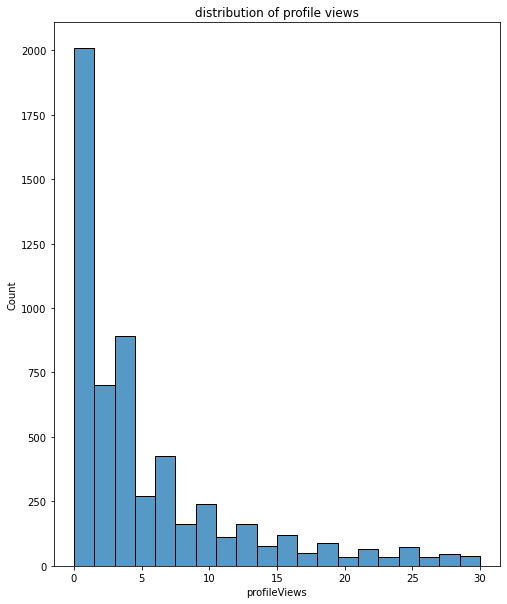

In [45]:
profile_views = cleaned_new_df[['UserId','profileViews']].drop_duplicates()['profileViews']
min_profile_views = cleaned_new_df[['UserId','profileViews']].drop_duplicates()['profileViews'].quantile(0)
max_profile_views = cleaned_new_df[['UserId','profileViews']].drop_duplicates()['profileViews'].quantile(0.9)
fig, ax = plt.subplots(figsize=(8, 10))
sns.histplot(data=profile_views, bins=20, binrange=(min_profile_views, max_profile_views))
plt.title('distribution of profile views')
plt.show()

- The "profile" views are right skewed. This is expected because most of users have zero views on their account. 
- A countable few have a lot of the views due to the quality of their answers or some other reason.
- 90% of people have less than 30 views in their profile

### analysis of posts per week(52 weeks) year 2021

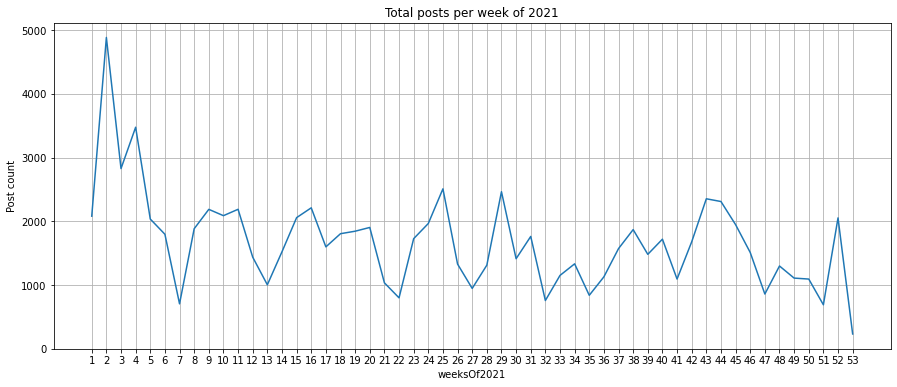

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))
df_2021 = cleaned_new_df.loc[cleaned_new_df['PostCreationDate'].dt.year == 2021].reset_index(drop=True)
df_2021['weeksOf2021'] = df_2021['PostCreationDate'].dt.isocalendar().week
data = df_2021.groupby('weeksOf2021')['PostId'].count().reset_index()
ax.grid()
ax.set_xticks(data['weeksOf2021'])
ax.set_ylabel('Post count')
sns.lineplot(data=data, x='weeksOf2021', y='PostId', err_style='bars')
ax.set_title('Total posts per week of 2021')
plt.show()

- There is a sudden drop-off in the number of posts per week after the 2nd and 6th week.
- It stabilizes thereafter.

### Yearly number of posts.
- There has been a steady decline in the number of datascience related posts since 2017.

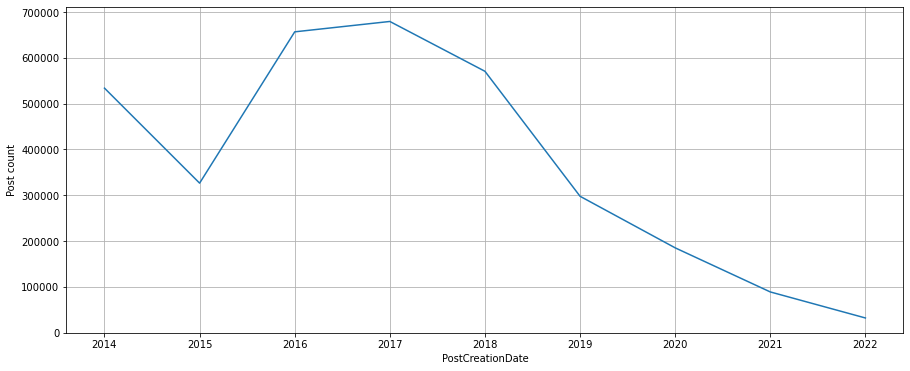

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))
yearly_posts = cleaned_new_df.groupby(cleaned_new_df['PostCreationDate'].dt.year)['PostScore'].count().reset_index()
ax.grid()
ax.set_xticks(yearly_posts['PostCreationDate'])
ax.set_ylabel('Post count')
sns.lineplot(data=yearly_posts, x='PostCreationDate', y='PostScore')
plt.show()

## Bivariate Analysis

### answercount vs upvoted(if there are more answers to a question, is the question upvoted a lot ?)
- Number of questions with 0 upvotes and answercount is very large, so applying Log scaling to visualize better.
- Invariably, highly upvotes questions get high number of answers.

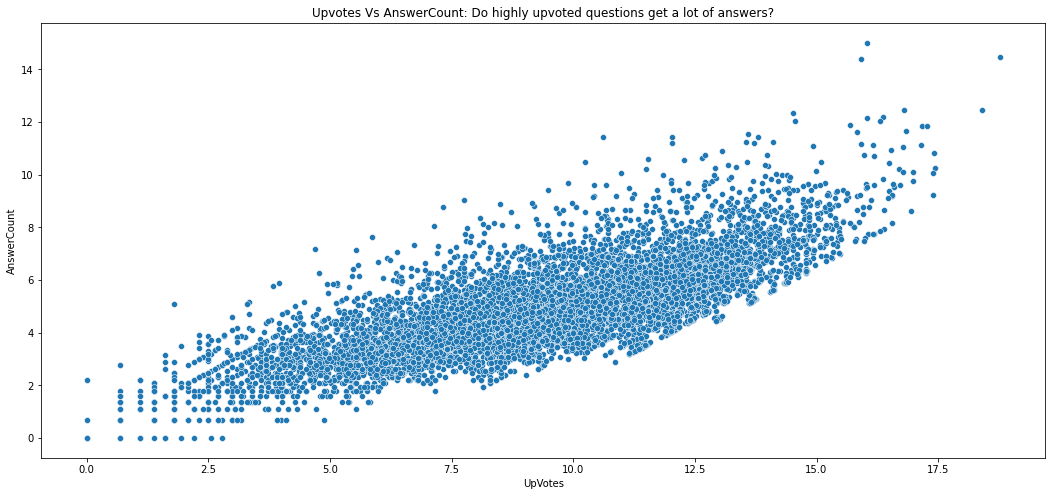

In [48]:
fig, ax = plt.subplots(figsize=(18, 8))
# Get total UpVotes and AnswerCount for each question.
upvotes_per_post = cleaned_new_df.groupby('PostId')['UpVotes'].sum().reset_index()
answer_count_per_post = cleaned_new_df.groupby('PostId')['AnswerCount'].sum().reset_index()

# merge the two dataframes
answer_upvotes_per_post = pd.merge(left=answer_count_per_post, right=upvotes_per_post)
answer_upvotes_per_post[['UpVotes', 'AnswerCount']] = answer_upvotes_per_post[['UpVotes', 'AnswerCount']].apply(np.log)

# Visualize the relation between the 2 features.
sns.scatterplot(data=answer_upvotes_per_post, x='UpVotes', y='AnswerCount', ax=ax)
ax.set_title('Upvotes Vs AnswerCount: Do highly upvoted questions get a lot of answers?')
plt.show()

### undeleted vs answercount.
- Which posts were voted to be "undeleted" by users. 
- How many answers did each such Post get.

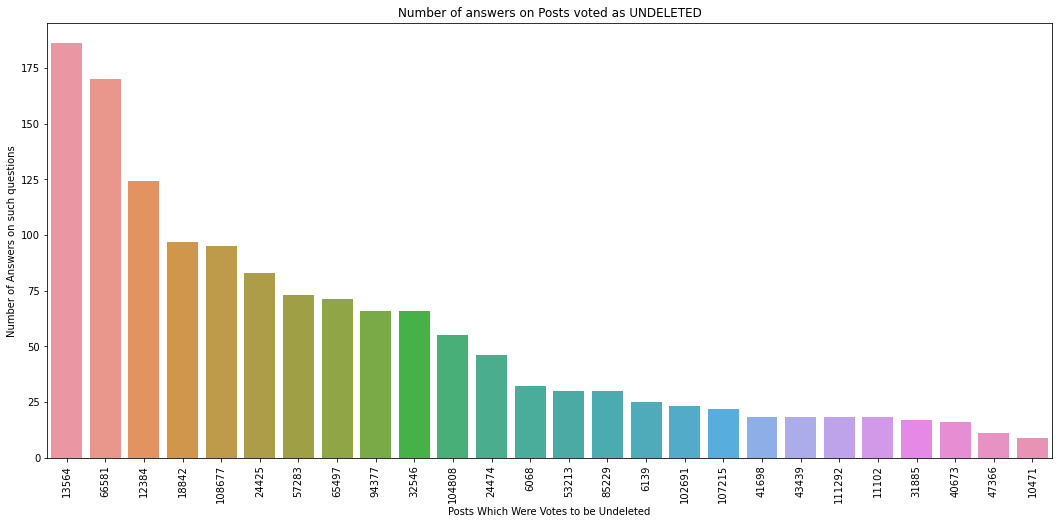

In [49]:
fig, ax = plt.subplots(figsize=(18, 8))
# Get the number of answers on each post that was voted as "undeleted"(VoteTypeId = 11), then sort it in descending order.
answers_on_undeleted_posts = cleaned_new_df.loc[cleaned_new_df['VoteTypeId'] == 11].groupby('PostId')['AnswerCount'].sum().sort_values(ascending=False)

# Get the posts on which there were no answers and delete them.
drop_zero_ans = answers_on_undeleted_posts.loc[answers_on_undeleted_posts==0].index
answers_on_undeleted_posts.drop(drop_zero_ans, inplace=True)

# plot all the posts(marked undeleted) that got some answers.
sns.barplot(x=answers_on_undeleted_posts.index, y=answers_on_undeleted_posts.values, order=answers_on_undeleted_posts.index)
ax.set_title('Number of answers on Posts voted as UNDELETED')
ax.set_xlabel('Posts Which Were Votes to be Undeleted')
ax.set_ylabel('Number of Answers on such questions')
plt.xticks(rotation=90)
plt.show()

## Multi-variate analysis

Analysis between PostBodyLength and PostViewCount and PostScore:

Text(0, 0.5, 'ViewCount')

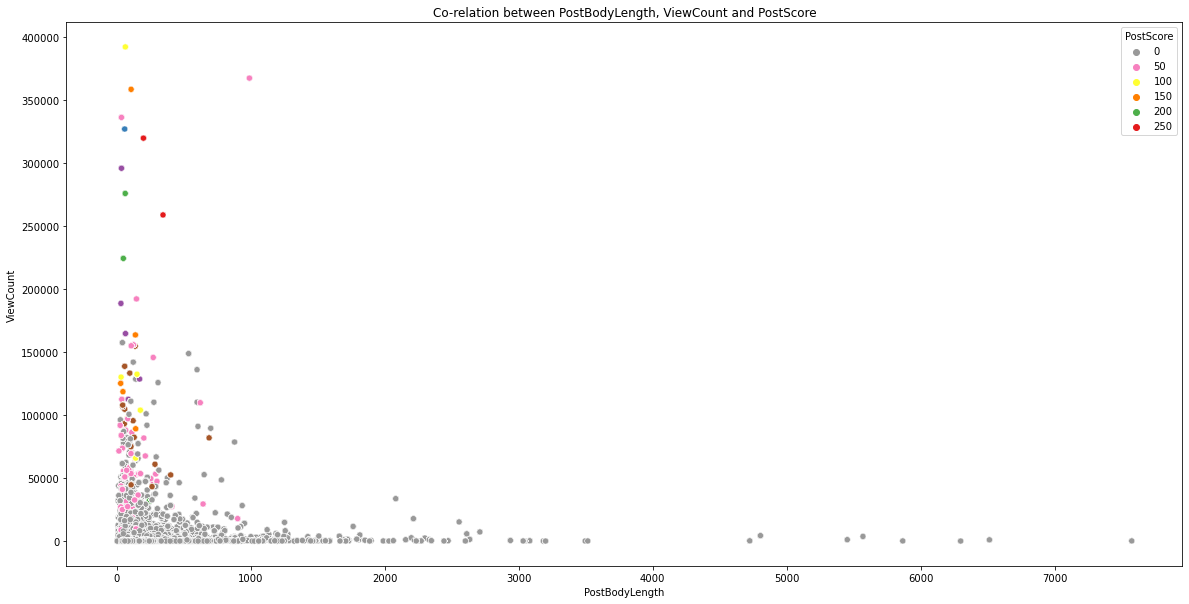

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.scatterplot(data=cleaned_new_df, x='PostBodyLength', y='PostViewCount', hue='PostScore',palette='Set1_r')
plt.title('Co-relation between PostBodyLength, ViewCount and PostScore')
plt.xlabel('PostBodyLength')
plt.ylabel('ViewCount')

From above graph, we can infer that;
- As the PostBodyLength increases, the view count of particular post is decreasing which means posts with shorter body length may reach to more people than with long body
- 90% of Posts, whose Post Score is atleast 50 are the ones with post body length ranges from 0 to 400

### badge vs reputation vs viewcount

In [51]:
palette = {1:"tab:blue",
           3:"tab:green", 
           2:"tab:red"}

C:\Users\blahb\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


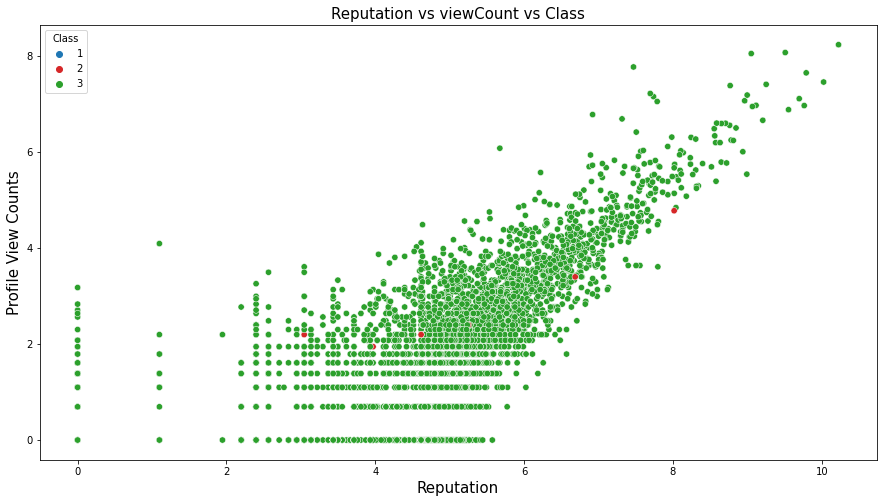

In [52]:
fig, ax = plt.subplots(figsize=(15, 8))
unique_users = cleaned_new_df.drop_duplicates(subset='UserId', keep='first')
unique_users[['Reputation', 'profileViews']] = unique_users[['Reputation', 'profileViews']].apply(np.log)
sns.scatterplot(data=unique_users, x='Reputation', y='profileViews', hue='Class', palette=palette, s=40)
ax.set_title('Reputation vs viewCount vs Class', fontsize=15)
ax.set_xlabel('Reputation', fontsize=15)
ax.set_ylabel('Profile View Counts', fontsize=15)
plt.show()

From the above plot, it can be inferred that users with high reputation get very high profile views. There is a general linear relationship between "reputation" and "profile View Count".

# Columns dropped in analysis:
Badges:
   - ID
   - TagBased

Users:
- ProfileImageUrl
- DisplayName
- WebsiteUrl
- AccountId
- AboutMe
- Location

Votes:
- UserId
- BountyAmount

Comments:
- UserDisplayName
- ContentLicense
- CommentText

Posts:
    - OwnerDisplayName 
    - CommunityOwnedDate
    - LastEditorDisplayName
    - ClosedDate
    - FavoriteCount
    - ContentLicense
    - Title
    - LastEditorUserId
    - LastEditDate

    
    In Combined Dataframe:
    - ParentId
    - AcceptAnswerId
    - OwnerUserId
    - LastActivityDate
    - CommenId
    - CommentScore
    - CommentCreationDate
    - CommentTextLength
    - VoteId
    - VoteCreationDate
    - LastAccessDate
    - PostTypeId
    - BadgesDate
    - Tags(Created newTags column for this by separating each tag)

# Challenges in Analysis:
1. Understanding the data dictionary and the business use of each variable presented challenges.
2. eliminating duplicate records during visualization.
3. Challenges in how to clean string columns and Feature Engineering of string columns for most use.
4. Joining of several tables each on differring columns.
5. Coming up with valid question of analysis that would improve understanding of data. 
6. Reducing size of data set from 1.5 GB to 270 Mb while maintaining most important features.
7. Improving the readabilty of visualizations.

# Learning/Observations from Analysis:
1. Univariate analysis
    - We understand the top 30 tags of the dataset.
    - "machinelearning" is the top of posts in this dataset.
    - Top Machine Learning Tags are Neural networks, supervised learning, classification, regression.
    - Data Science tags are Python, R, SQL.
    Views:
    - The "profile" views are right skewed. This is expected because most of users have zero views on their account.
    - A countable few have a lot of the views due to the quality of their answers or some other reason.
    - 90% of people have less than 30 views in their profile
    posts per week:
    - There is a sudden drop-off in the number of posts per week after the 2nd and 6th week. It stabilizes thereafter.
    - There has been a steady decline in the number of datascience related posts since 2017.
    
2. Bivariate Analysis
    - Number of questions with 0 upvotes and answercount is very large, so applying Log scaling to visualize better.
    - Invariably, highly upvotes questions get high number of answers.

3. Multivariate Analysis
    - As the PostBodyLength increases, the view count of particular post is decreasing which means posts with shorter body length may reach to more people than with long body.
    - 90% of Posts, whose Post Score is atleast 50 are the ones with post body length ranges from 0 to 400.
    - It can be inferred that users with high reputation get very high profile views. There is a general linear relationship between "reputation" and "profile View Count".

# Conclusion/Summary:

- 'machinelearning', 'neuralnetwork', 'python', 'deeplearning', 'classification', 'datamining', 'clustering' are some of the most frequently used Tags in this Dataset.
- For a question to get the most number of answers, it is better to have questions-  of length less than 1000 words.
- Profiles of the most reputed users get the most number of views.